In [28]:
import pandas as pd
import rasterio
from matplotlib import pyplot as plt

from damage.features import RasterSplitter

def plot_image(image):
    fix, ax = plt.subplots(figsize=(25, 25))
    ax.imshow(image)
    return ax

In [29]:
raster_path = '../data/city_rasters'
raster_file_name = 'daraa_2017_02_07_zoom_19.tif'
raster = rasterio.open('{}/{}'.format(raster_path, raster_file_name))
raster_array = RasterSplitter._raster_to_array(raster)

In [30]:
path = '../logs/predictions'
file_name = 'prediction_1558374911.p'
results = pd.read_pickle('{}/{}'.format(path, file_name))
print(results.shape)
results.head()

(62, 1)


prediction
(daraa, 960-3520, 2014-05-01 00:00:00)          1.0
(daraa, 1600-3520, 2014-05-01 00:00:00)         1.0
(daraa, 2240-3520, 2014-05-01 00:00:00)         1.0
(daraa, 2240-4160, 2014-05-01 00:00:00)         1.0
(daraa, 2880-4160, 2014-05-01 00:00:00)         1.0

In [39]:
prediction_destroyed = results.loc[results['prediction'] == 1]
prediction_non_destroyed = results.loc[results['prediction'] == 0]
patches_destroyed = pd.DataFrame([elem[1].split('-') for elem in prediction_destroyed.index.tolist()], columns=['row', 'column']).astype(int)
patches_non_destroyed = pd.DataFrame([elem[1].split('-') for elem in prediction_non_destroyed.index.tolist()], columns=['row', 'column']).astype(int)

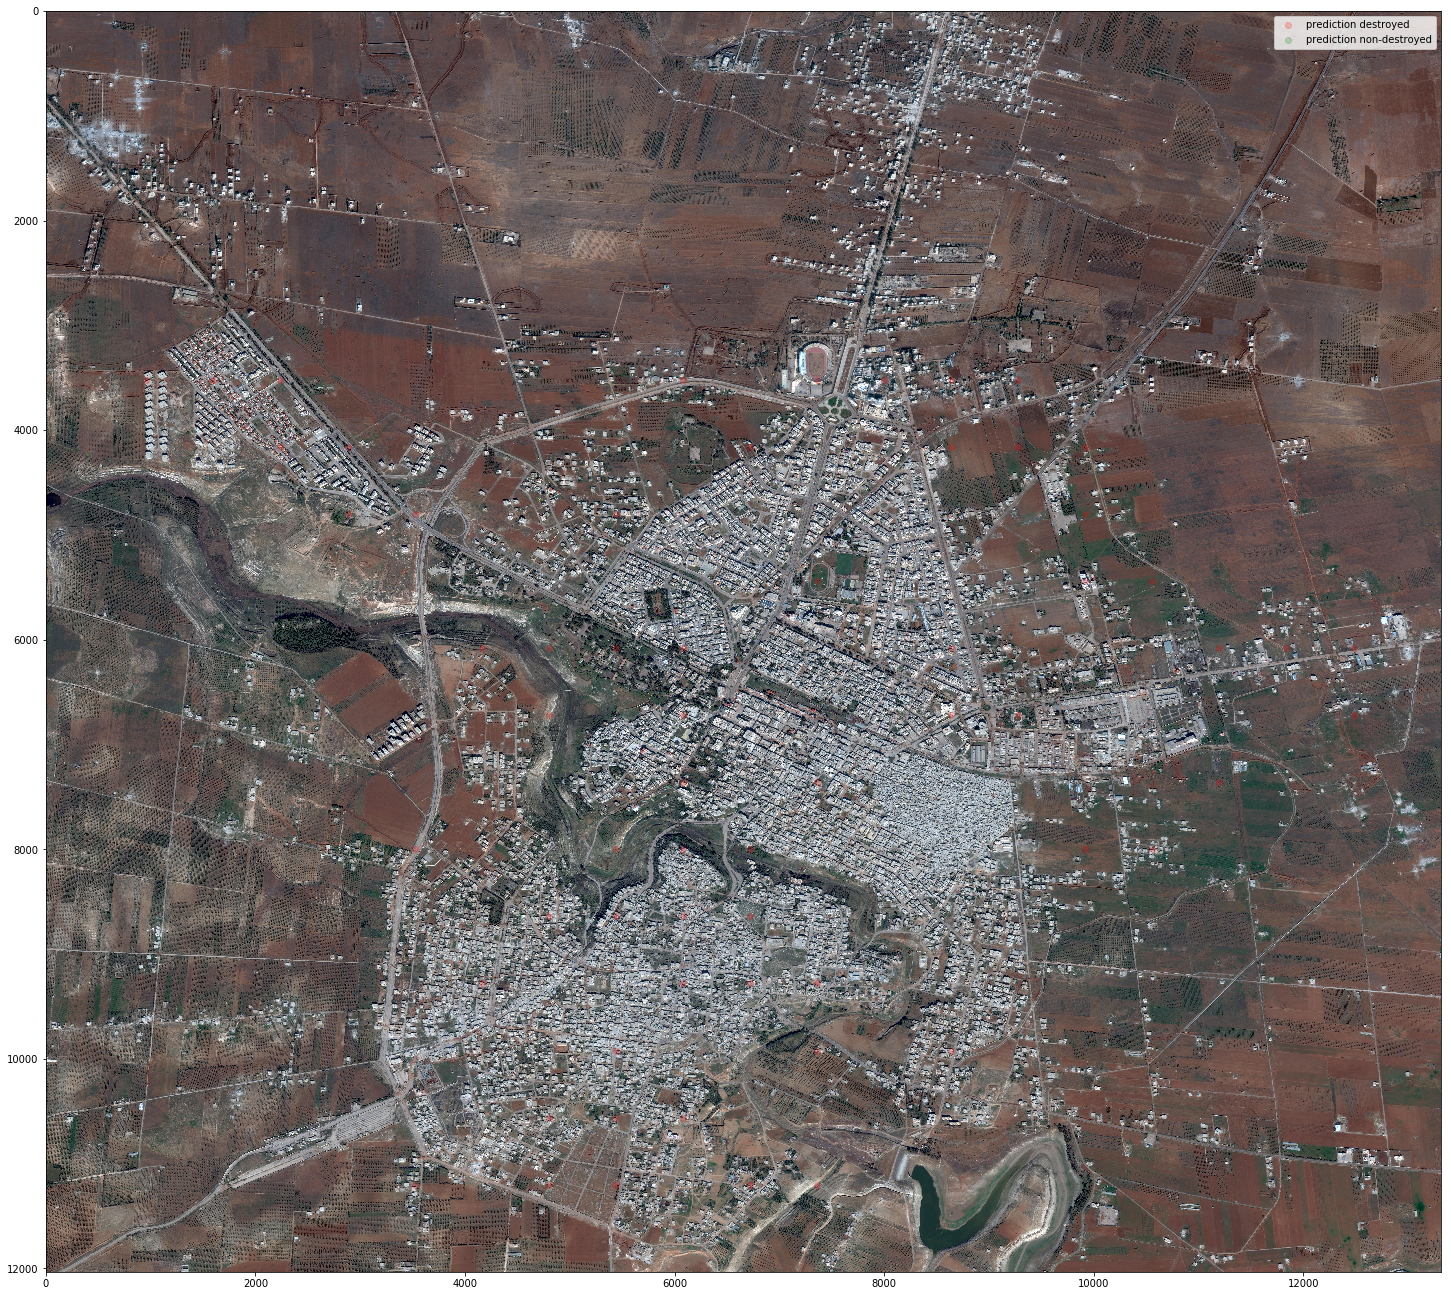

In [43]:
ax = plot_image(raster_array)
ax.scatter(patches_destroyed['row'], patches_destroyed['column'], color='r', label='prediction destroyed', alpha=0.2)
ax.scatter(patches_non_destroyed['row'], patches_non_destroyed['column'], color='g', label='prediction non-destroyed', alpha=0.2)
plt.legend()